In [1]:
import numpy as np
import os
import pandas as pd
import sys
import random

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from subprocess import call

sys.path.append(os.getcwd())

import dbm_py.interface as dbm

# list all classes and functions in the module
dir(dbm)

['AUTO_DBM',
 'DBM',
 'Data_set',
 'Matrix',
 'Params',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'dbm_cpp_interface',
 'float_matrix_to_np2darray',
 'np',
 'np2darray_to_float_matrix',
 'os',
 'string_to_params',
 'sys']

In [2]:
# it is already known the data has this shape
n_samples = 136573
n_features = 51

# load from the file
data = dbm.Matrix(n_samples, n_features, file_name = 'numerai_training_data.csv', sep = ',')

# convert the Matrix object to a numpy array for easy manipulation
np_data = data.to_np2darray()

# python random seeds
random.seed(1)
np.random.seed(1)

# add several slightly irrelevant predictors
artificial_predictors = np.concatenate([np_data[:, 4][:, np.newaxis] + np.random.rand(n_samples, 1),
                                       np_data[:, 20][:, np.newaxis] + 2 * np.random.rand(n_samples, 1),
                                       np_data[:, 33][:, np.newaxis] + 3 * np.random.rand(n_samples, 1),
                                       np_data[:, 41][:, np.newaxis] + 4 * np.random.rand(n_samples, 1),
                                       np_data[:, 48][:, np.newaxis] + 5 * np.random.rand(n_samples, 1),
                                       np.random.rand(n_samples, 1)], axis = 1)
for no in range(artificial_predictors.shape[1]):
    artificial_predictors[:, no] = artificial_predictors[:, no] / (np.max(artificial_predictors[:, no]) + 1e-3)

np_data = np.concatenate([np_data[:, :-1], artificial_predictors, np_data[:, -1][:, np.newaxis]], axis = 1)

# add some NaNs
percentage_of_height = 0.1
percentage_of_width = 0.2

height_indices = range(np_data.shape[0])
width_indices = range(np_data.shape[1])

random.shuffle(height_indices)
random.shuffle(width_indices)

height_indices = height_indices[:int(percentage_of_height * np_data.shape[0])]
width_indices = width_indices[:int(percentage_of_width * np_data.shape[1])]

for i in height_indices:
    for j in width_indices:
        if np.random.rand() > 0.5:
            np_data[i, j] = np.nan
        
print(np_data[:3, :])

[[ 0.65655071  0.17974587  0.50637496  0.58441842         nan         nan
   0.1997302   0.60401207  0.68112212  0.51651436  0.51922584  0.37427661
   0.25940666  0.47677931  0.36793855  0.16091791  0.41999462  0.25715002
   0.4849951   0.404984    0.82434744  0.65066624  0.67819411  0.56123984
   0.62704188  0.53239882  0.52674258  0.71532154  0.63146424  0.59695798
          nan  0.58865499  0.60058564  0.38635999  0.81914467  0.34499285
   0.4899874   0.43393236  0.49554691  0.62108809  0.5867272   0.58616936
   0.42198312  0.69589913  0.67699897  0.58339167  0.37410623  0.7886498
   0.49101004  0.5125196   0.5204242   0.7096552   0.55354792  0.30002171
   0.49102205  0.0193041   1.        ]
 [ 0.71297675  0.429746    0.41043013  0.60605401  0.66616333  0.44315162
   0.34305418  0.41958514  0.65142769  0.67285246  0.50672907  0.35259748
   0.67878437  0.58140093  0.42786935  0.4237482   0.70933825  0.31364778
   0.38554519  0.39592227  0.57378256  0.66187972  0.44653615  0.43125397


In [3]:
# convert the numpy arrays to Matrix objects
predictors = dbm.np2darray_to_float_matrix(np_data[:, :56])
response = dbm.np2darray_to_float_matrix(np_data[:, 56][:, np.newaxis])

print('The shape of predictors is ' + str(predictors.shape()[0]) + '*' + str(predictors.shape()[1]))
print('The shape of response is ' + str(response.shape()[0]) + '*' + str(response.shape()[1]) + '\n')

# set the random seeds (positive seeds mean fixed seeds and negative seeds mean random seeds)
random_seed_for_splitting_data = 1
random_seed_for_training = 7

# split the whole data into training (80%) and validation (20%)
data_set = dbm.Data_set(predictors, response, 0.2, random_seed_for_splitting_data)

# set parameters and use default values if not specified
s = 'dbm_no_bunches_of_learners 100 dbm_no_cores 3 dbm_loss_function b ' \
    'pdp_no_resamplings 6 pdp_resampling_portion 0.05 ' \
    'dbm_portion_train_sample 0.3 dbm_no_candidate_feature 30 dbm_shrinkage 0.05 ' \
    'dbm_random_seed ' + str(random_seed_for_training) + ' '
params = dbm.Params()
params.set_params(s)

# print all parameters for checking
print('Parameters are listed as below. \n')
params.print_all()

The shape of predictors is 136573*56
The shape of response is 136573*1

Parameters are listed as below. 

cart_max_depth = 3
cart_min_samples_in_a_node = 50
cart_prune = 1
dbm_accumulated_portion_shrinkage_for_selected_bl = 1.05
dbm_display_training_progress = True
dbm_do_perf = True
dbm_freq_showing_loss_on_test = 1
dbm_loss_function = b
dbm_min_no_samples_per_bl = 50
dbm_no_bunches_of_learners = 100
dbm_no_candidate_feature = 30
dbm_no_cores = 3
dbm_nonoverlapping_training = 1
dbm_portion_for_d = 0.2
dbm_portion_for_k = 0.2
dbm_portion_for_lr = 0.2
dbm_portion_for_nn = 0.0
dbm_portion_for_s = 0.2
dbm_portion_for_trees = 0.2
dbm_portion_shrinkage_for_unselected_bl = 3.0
dbm_portion_train_sample = 0.3
dbm_random_seed = 7
dbm_record_every_tree = False
dbm_remove_rows_containing_nans = 1
dbm_shrinkage = 0.05
dpcs_no_ticks = 10
dpcs_range_shrinkage_of_ticks = 0.1
kmeans_fraction_of_pairs = 0.01
kmeans_max_iteration = 50
kmeans_no_centroids = 5
kmeans_tolerance = 0.01
lr_regularization = 0

In [4]:
# create an AUTO_DBM object from the parameters
auto_model = dbm.AUTO_DBM(params)

# train without monotonic constraints
auto_model.train(data_set)

# save the performance on the training set and validation set
auto_model.save_performance('performance.txt')

# load it into a pandas DataFrame
performance = pd.read_csv('performance.txt', sep = '\t')
print(performance)

     Iteration    Train Loss     Test Loss
0            0  6.931280e-01  6.931110e-01
1            1  6.929000e-01  6.929470e-01
2            2  6.928510e-01  6.929010e-01
3            3  6.927280e-01  6.927690e-01
4            4  6.926140e-01  6.926730e-01
5            5  6.925370e-01  6.925820e-01
6            6  6.924460e-01  6.924940e-01
7            7  6.924120e-01  6.924770e-01
8            8  6.923930e-01  6.924580e-01
9            9  6.923730e-01  6.924370e-01
10          10  6.922100e-01  6.922710e-01
11          11  6.920800e-01  6.920980e-01
12          12  6.920260e-01  6.920330e-01
13          13  6.919990e-01  6.920230e-01
14          14  6.919610e-01  6.919990e-01
15          15  6.919150e-01  6.919840e-01
16          16  6.918730e-01  6.919840e-01
17          17  6.918590e-01  6.919700e-01
18          18  6.918550e-01  6.919860e-01
19          19  6.917880e-01  6.919410e-01
20          20  6.917370e-01  6.918890e-01
21          21  6.916980e-01  6.918260e-01
22         

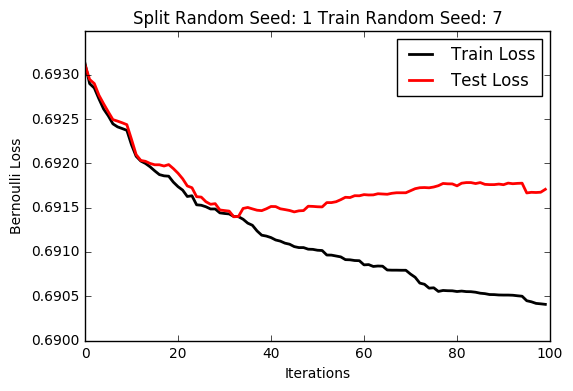

In [5]:
# make a plot of the performance
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(performance['Train Loss'][:-1], 'k-', linewidth = 2)
ax.plot(performance['Test Loss'][:-1], 'r-', linewidth = 2)
ax.set_ylabel('Bernoulli Loss')
ax.set_xlabel('Iterations')
ax.set_title('Split Random Seed: ' + str(random_seed_for_splitting_data) + ' Train Random Seed: ' + str(random_seed_for_training))
ax.legend()

In [6]:
# predict for the part of data not used in training
prediction_for_validation = auto_model.predict(data_set.get_validate_x())

# convert to numpy array
prediction_array = prediction_for_validation.to_np2darray()

# binary prediction
true_list = [item > 0.5 for item in data_set.get_validate_y().to_np2darray()[:, 0].tolist()]

def cal_accuracy(threshold):
    return np.sum((prediction_array > threshold) == np.array(true_list)[:, np.newaxis]) / float(len(true_list))

print('Accuracy on the pull-out set is ' + str(cal_accuracy(0.5)))

Accuracy on the pull-out set is 0.521051475434


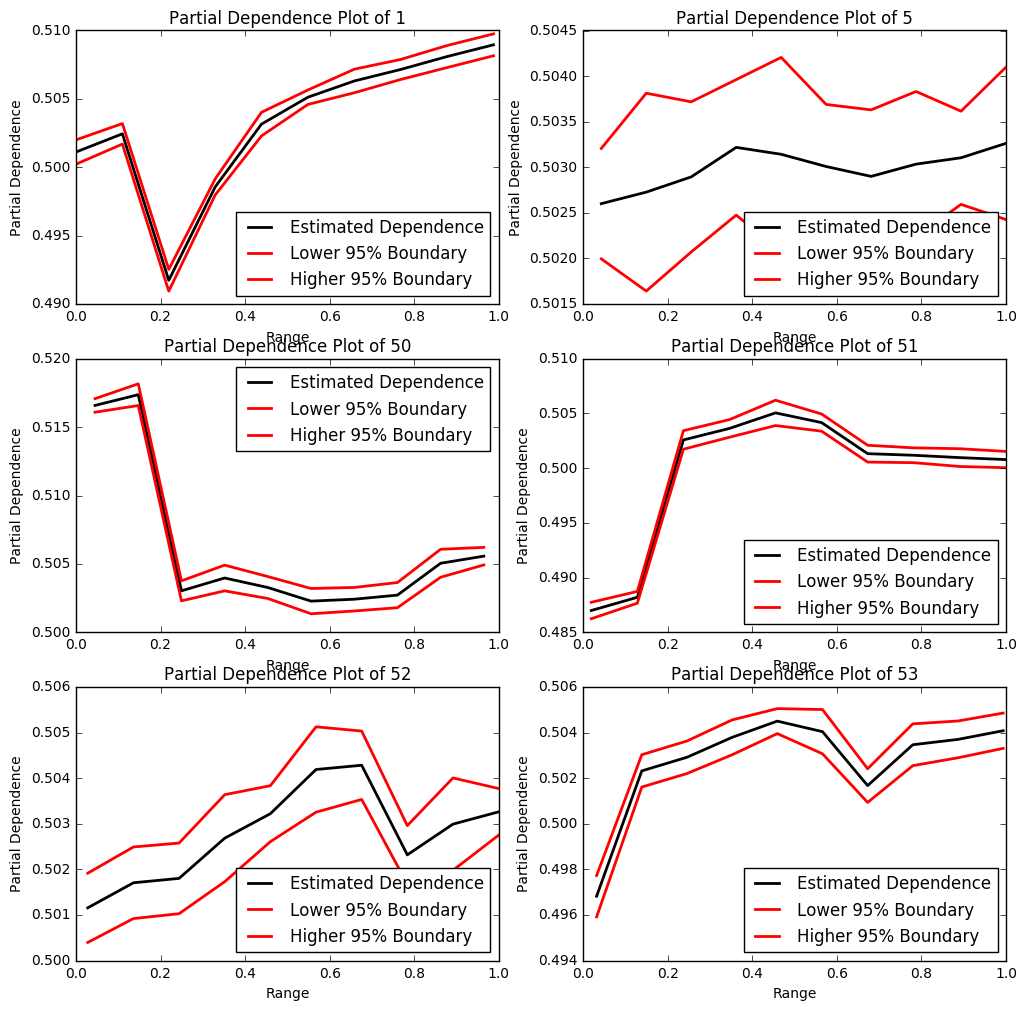

In [7]:
# partial dependence plot
def predictor_pdp(predictor_index, fig_handle, subplot_index, height, width):
    pdp_result = auto_model.pdp(data_set.get_train_x(), predictor_index)

    # convert to a numpy array
    pdp_array = pdp_result.to_np2darray()

    # make plot
    ax = fig_handle.add_subplot(height * 100 + width * 10 + subplot_index)
    ax.plot(pdp_array[:, 0], pdp_array[:, 1], 'k-', linewidth = 2, label = 'Estimated Dependence')
    ax.plot(pdp_array[:, 0], pdp_array[:, 2], 'r-', linewidth = 2, label = 'Lower 95% Boundary')
    ax.plot(pdp_array[:, 0], pdp_array[:, 3], 'r-', linewidth = 2, label = 'Higher 95% Boundary')
    ax.set_ylabel('Partial Dependence')
    ax.set_xlabel('Range')
    ax.set_title('Partial Dependence Plot of ' + str(predictor_index))
    ax.legend(loc = 'best')

predictors_of_interests = [1, 5, 50, 51, 52, 53]
    
fig = plt.figure(figsize = (12, 12))
for [no, index] in zip(range(len(predictors_of_interests)), predictors_of_interests):
    predictor_pdp(index, fig, no + 1, 3, 2)
    no += 1


In [8]:
# statistical significance
# it takes a long time to run, which depends on the size of the data used and other paremeters in Params
ss_result = auto_model.ss(data_set.get_train_x())

# convert to a numpy array
ss_array = ['SS of Predictor ' + str(item[0]) + ' is ' + str(item[1]) 
            for item in zip(range(56), ss_result.to_np2darray()[:, 0].tolist())]

for item in ss_array:
    print(item)

SS of Predictor 0 is 0.997300028801
SS of Predictor 1 is 0.997300028801
SS of Predictor 2 is 0.997300028801
SS of Predictor 3 is 0.997300028801
SS of Predictor 4 is 0.997300028801
SS of Predictor 5 is 0.631879985332
SS of Predictor 6 is 0.997300028801
SS of Predictor 7 is 0.997300028801
SS of Predictor 8 is 0.997300028801
SS of Predictor 9 is 0.997300028801
SS of Predictor 10 is 0.997300028801
SS of Predictor 11 is 0.997300028801
SS of Predictor 12 is 0.997300028801
SS of Predictor 13 is 0.997300028801
SS of Predictor 14 is 0.997300028801
SS of Predictor 15 is 0.997300028801
SS of Predictor 16 is 0.997300028801
SS of Predictor 17 is 0.997300028801
SS of Predictor 18 is 0.997300028801
SS of Predictor 19 is 0.997300028801
SS of Predictor 20 is 0.997300028801
SS of Predictor 21 is 0.997300028801
SS of Predictor 22 is 0.997300028801
SS of Predictor 23 is 0.997300028801
SS of Predictor 24 is 0.997300028801
SS of Predictor 25 is 0.997300028801
SS of Predictor 26 is 0.997300028801
SS of Predi

(0, 0.03)

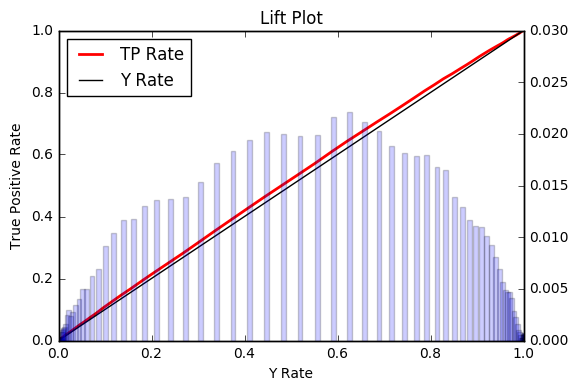

In [9]:
# def calculation function
prediction_on_true_samples = prediction_array[np.where(true_list)[0]]

def tp_rate(threshold):
    return np.sum(prediction_on_true_samples > threshold) / float(len(prediction_on_true_samples))

def y_rate(threshold):
    return np.sum(prediction_array > threshold) / float(len(prediction_array))

# lift plot
min_prediction_on_true_samples = np.min(prediction_on_true_samples)
max_prediction_on_true_samples = np.max(prediction_on_true_samples)

tp_list = [tp_rate(item) for item in np.linspace(max_prediction_on_true_samples, min_prediction_on_true_samples, 100).tolist()]
y_list = [y_rate(item) for item in np.linspace(max_prediction_on_true_samples, min_prediction_on_true_samples, 100).tolist()]

# # make plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_list, tp_list, 'r-', linewidth = 2, label = 'TP Rate')
ax.plot(y_list, y_list, 'k-', label = 'Y Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('Y Rate')
ax.set_title('Lift Plot')
ax.legend(loc = 'best')

ax_twin = ax.twinx()
ax_twin.bar(y_list, [(item[0] - item[1]) for item in zip(tp_list, y_list)], width = 1.0/len(y_list), alpha = 0.2)
ax_twin.set_xlim([0, 1])
ax_twin.set_ylim([0, 0.03])

In [10]:
# save the model
auto_model.save('auto_dbm_0.txt')

print(os.listdir('.'))

['means.txt', 'stds.txt', 'dbm_py', 'dbm_r', 'numerai_training_data.csv', 'dbmPythonApplication.ipynb', 'auto_dbm_0.txt', 'x_ticks.txt', 'performance.txt', 'main_test.py', '.ipynb_checkpoints']


In [11]:
# load a model from the file
reconstructed = dbm.AUTO_DBM(dbm.Params())
reconstructed.load('auto_dbm_0.txt')

reconstructed.save('auto_dbm_reconstructed.txt')

In [12]:
%%bash
# use bash command to see if the two saved files are identical or not

ls

diff auto_dbm_0.txt auto_dbm_reconstructed.txt

auto_dbm_0.txt
auto_dbm_reconstructed.txt
dbm_py
dbmPythonApplication.ipynb
dbm_r
main_test.py
means.txt
numerai_training_data.csv
performance.txt
stds.txt
x_ticks.txt


In [13]:
# compare prediction from the original model and the reconstructed model
prediction_from_original = auto_model.predict(data_set.get_validate_x()).to_np2darray()
prediction_from_reconstructed = auto_model.predict(data_set.get_validate_x()).to_np2darray()

# sum of absolute error
print(np.sum(np.abs(prediction_from_original - prediction_from_reconstructed)))

0.0


In [ ]:
# end